In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

olympics_data = pd.read_csv('athletes.csv')
noc = pd.read_csv('noc.csv')

## NOC dataset

In [2]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [3]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  230 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [4]:
noc.describe()

,NOC,region,notes
count,230,230,21
unique,230,209,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [5]:
noc.isnull().sum()

NOC         0
region      0
notes     209
dtype: int64

## Athletes dataset

In [6]:
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
olympics_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
olympics_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## Merging both datasets

The column *Team* is not an accurate representation of the country because in old Olympics people sometime competed for proper Teams. The column *NOC*, on the other hand, is an accurate representation of the country but nothing is visually better than the country name itself. This is why we are going to merge both datasets.

In [11]:
olympics = olympics_data.merge(noc[['NOC', 'region']], on='NOC', how='left')
olympics['Team'] = olympics['region']
olympics.drop(columns=['region'], inplace=True)
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Country analysis

### Most total athletes

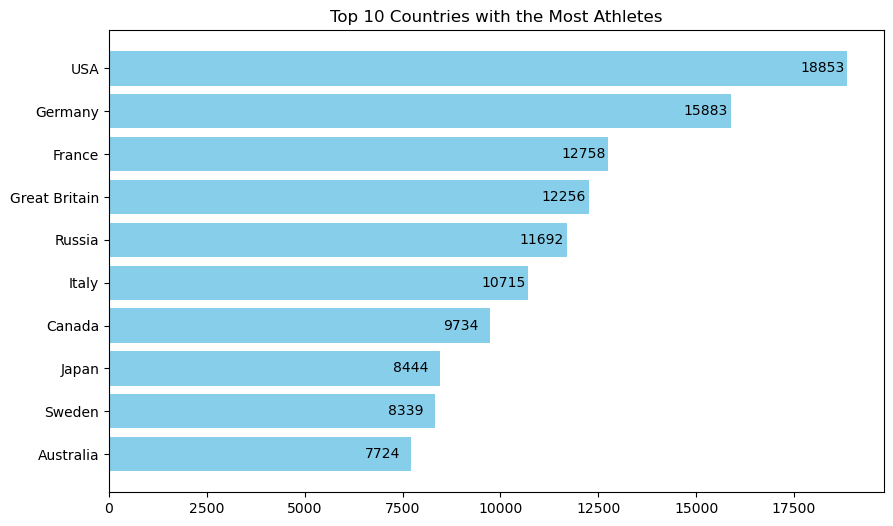

In [12]:
top_10_most_athletes = olympics['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_most_athletes.index, top_10_most_athletes.values, color='skyblue')
plt.title('Top 10 Countries with the Most Athletes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_most_athletes.values):
    plt.text(bar.get_width() - 1200, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Most athletes by edition

In [13]:
athletes_by_edition_countries = olympics.groupby(['Team', 'Games']).agg({'Name': 'count'})
athletes_by_edition_countries.rename(columns={'Name': 'Athletes'}, inplace=True)
athletes_by_edition_countries.sort_values(by='Athletes', ascending=False).head(15)

Athletes
Team          Games                
USA           1904 Summer      1109
France        1900 Summer      1071
Germany       1972 Summer      1041
Great Britain 1908 Summer       972
Germany       1988 Summer       918
              1976 Summer       859
USA           1996 Summer       839
Australia     2000 Summer       788
Germany       1968 Summer       778
China         2008 Summer       777
USA           2000 Summer       764
              2008 Summer       763
              1932 Summer       743
              1992 Summer       734
              2004 Summer       726

### Most gold medals

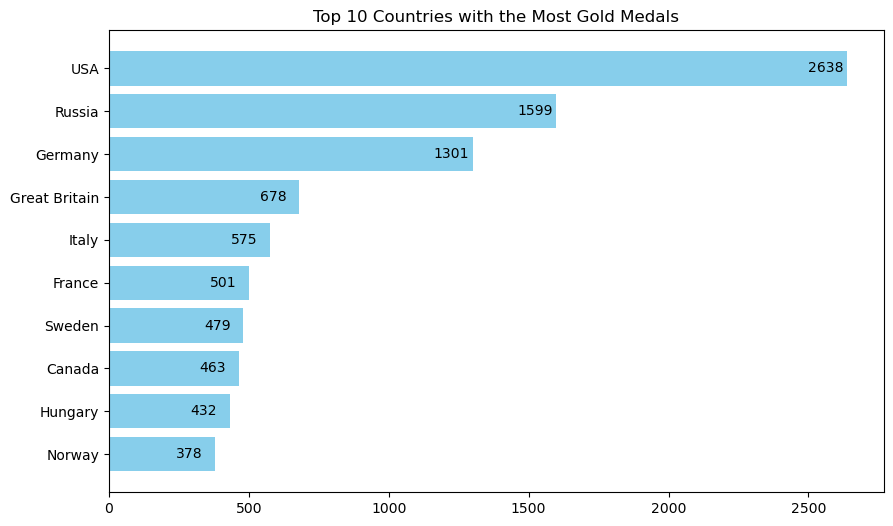

In [14]:
gold_medals = olympics[olympics['Medal'] == 'Gold']
top_10_gold_medals = gold_medals['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_gold_medals.index, top_10_gold_medals.values, color='skyblue')
plt.title('Top 10 Countries with the Most Gold Medals')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_gold_medals.values):
    plt.text(bar.get_width() - 140, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Most total medals

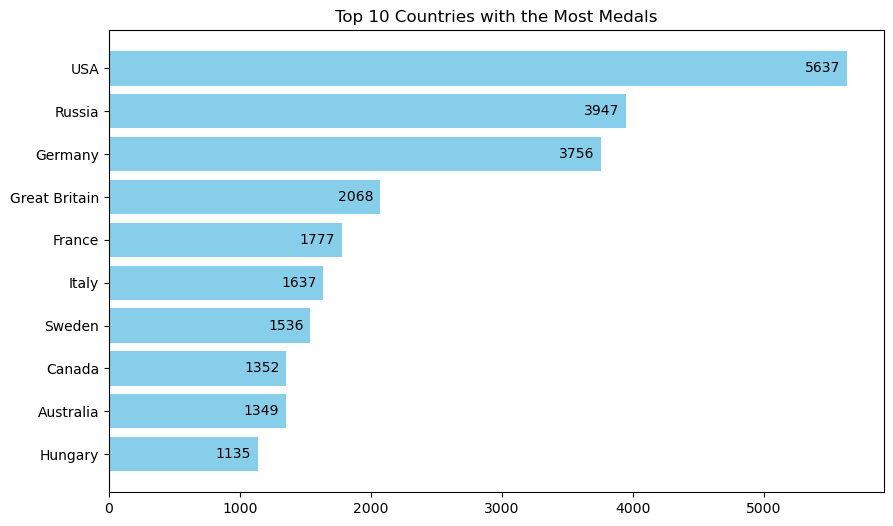

In [15]:
total_medals = olympics[olympics['Medal'].notnull()]
top_10_total_medals = total_medals['Team'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_total_medals.index, top_10_total_medals.values, color='skyblue')
plt.title('Top 10 Countries with the Most Medals')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_total_medals.values):
    plt.text(bar.get_width() - 320, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### All-time medal table

In [21]:
medal_counts = olympics.groupby(['Team', 'Medal']).size().unstack(fill_value=0)
medal_counts['Total'] = medal_counts.sum(axis=1)
medal_table = medal_counts[['Gold', 'Silver', 'Bronze', 'Total']].sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=False)
medal_table.head(20)

Medal,Gold,Silver,Bronze,Total
Team,,,,
USA,2638,1641,1358,5637
Russia,1599,1170,1178,3947
Germany,1301,1195,1260,3756
Great Britain,678,739,651,2068
Italy,575,531,531,1637
France,501,610,666,1777
Sweden,479,522,535,1536
Canada,463,438,451,1352
Hungary,432,332,371,1135


### Only 1 medal

- Nepal, Jordan and Kosovo only have 1 medal in the Olympics history and it's a Gold one.
- Monaco also has only 1 medal and the Sport is set as "Art Competitions". We might explore this later on.
- Both London 2012 and Seoul 1988 saw 4 countries getting their first and, until 2016, only medal.

In [17]:
only_1_medal = medal_table[medal_table['Total'] == 1].index.tolist()
filtered_1medal = olympics[(olympics['Team'].isin(only_1_medal)) & (olympics['Medal'].notnull())]
filtered_1medal.reset_index(drop=True).sort_values(by='Year')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,78035,Julien Joseph Sylvio Mdcin,M,29.0,NaN,NaN,Monaco,MON,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Architecture,Bronze
7,16457,Tejbir Bura,M,NaN,NaN,NaN,Nepal,NEP,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold
3,6327,Abdul Wahid Aziz,M,NaN,174.0,67.0,Iraq,IRQ,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Lightweight,Bronze
9,48559,Clarence Hill,M,25.0,187.0,90.0,Bermuda,BER,1976 Summer,1976,Summer,Montreal,Boxing,Boxing Men's Heavyweight,Bronze
2,4512,Michael Anthony Parris,M,22.0,173.0,54.0,Guyana,GUY,1980 Summer,1980,Summer,Moskva,Boxing,Boxing Men's Bantamweight,Bronze
10,49468,Peter William Holmberg,M,27.0,180.0,90.0,US Virgin Islands,ISV,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed One Person Dinghy,Silver
18,104592,Ahmed Salah Houssein,M,31.0,180.0,64.0,Djibouti,DJI,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,Bronze
5,12684,Jan D. Boersma,M,19.0,NaN,NaN,Curacao,AHO,1988 Summer,1988,Summer,Seoul,Sailing,Sailing Mixed Windsurfer,Silver
8,28124,El Hadji Amadou Dia B,M,29.0,190.0,72.0,Senegal,SEN,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 400 metres Hurdles,Silver
21,131348,Paea Wolfgramm,M,26.0,185.0,140.0,Tonga,TGA,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Super-Heavyweight,Silver


## Sports analysis

### Most total athletes

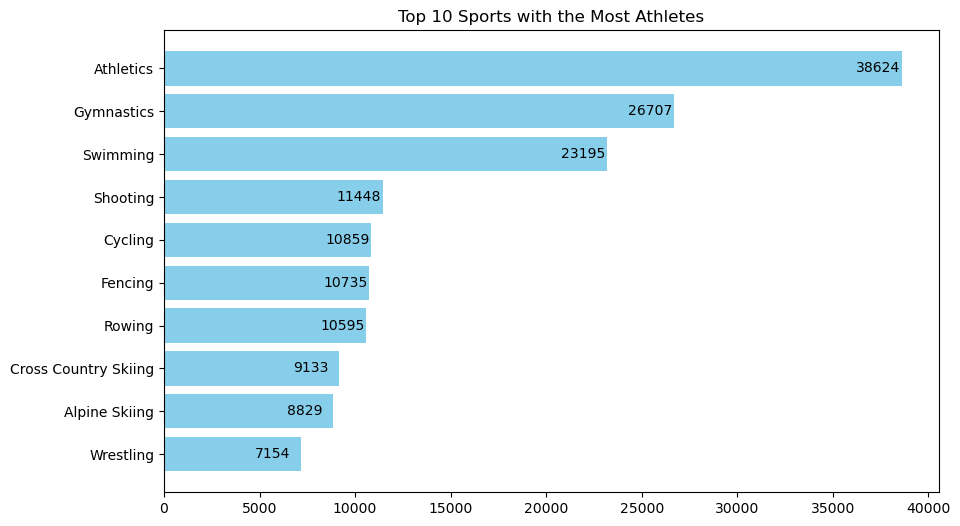

In [22]:
top_10_most_athletes_sports = olympics.groupby('Sport')['Name'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_most_athletes_sports.index, top_10_most_athletes_sports.values, color='skyblue')
plt.title('Top 10 Sports with the Most Athletes')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_most_athletes_sports.values):
    plt.text(bar.get_width() - 2400, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Most athletes by edition

In [19]:
athletes_by_edition_sports = olympics.groupby(['Sport', 'Games']).agg({'Name': 'count'})
athletes_by_edition_sports.rename(columns={'Name': 'Athletes'}, inplace=True)
athletes_by_edition_sports.sort_values(by='Athletes', ascending=False).head(15)

Athletes
Sport      Games                
Athletics  2016 Summer      2508
           2000 Summer      2468
Gymnastics 1952 Summer      2391
Athletics  1996 Summer      2386
           2012 Summer      2278
           2008 Summer      2244
           2004 Summer      2175
           1988 Summer      2062
           1992 Summer      2054
Swimming   2008 Summer      1749
Gymnastics 1960 Summer      1746
Swimming   2000 Summer      1741
Athletics  1972 Summer      1686
           1984 Summer      1674
Swimming   1996 Summer      1635

### Most gold medals awarded

Looks like the dataset considers everyone as medalists in collective sports like Football and Hockey. Although this is probably how it should be for this dataset, this is not how the official medal tables work. Due to this, medal counts can be somewhat skewed depending on the sport we look into.

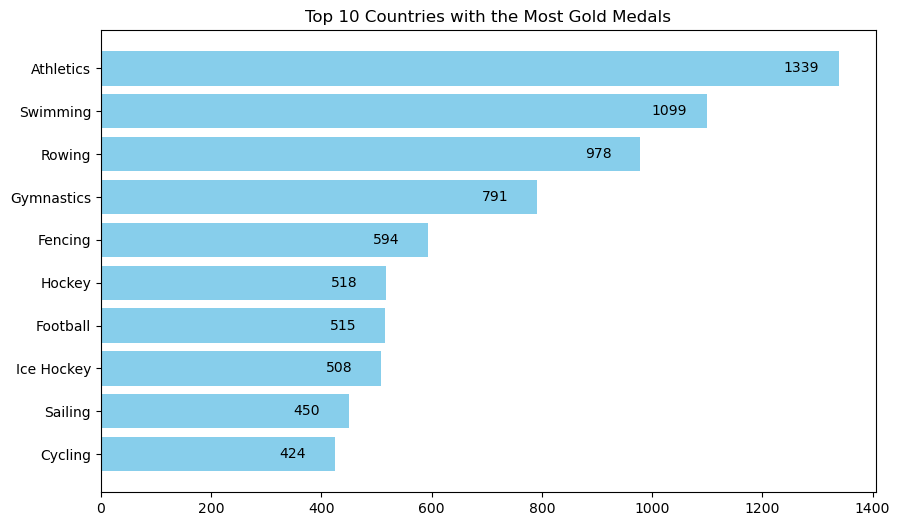

In [31]:
gold_medals_sports = olympics[olympics['Medal'] == 'Gold']
gold_medals_by_sport = gold_medals_sports.groupby('Sport').size().reset_index(name='Gold').sort_values(by='Gold', ascending=False)
gold_medals_by_sport_top10 = gold_medals_by_sport.head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(gold_medals_by_sport_top10['Sport'], gold_medals_by_sport_top10['Gold'], color='skyblue')
plt.title('Top 10 Countries with the Most Gold Medals')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, gold_medals_by_sport_top10['Gold']):
    plt.text(bar.get_width() - 100, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

In [ ]:
gold_medals_sports = olympics[olympics['Medal'] == 'Gold']
gold_medals_by_sport = gold_medals_sports.groupby('Sport').size().reset_index(name='Gold Medals Count')

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_gold_medals.index, top_10_gold_medals.values, color='skyblue')
plt.title('Top 10 Countries with the Most Gold Medals')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest accuracy at the top

# Adding values inside each bar
for bar, value in zip(bars, top_10_gold_medals.values):
    plt.text(bar.get_width() - 140, bar.get_y() + bar.get_height() / 2, f'{value}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### First occurence of each sport

We can see here when each sport entered the Olympics. We have really old sports that are not even played anymore - like the Tug-Of-War and Jeu De Paume - but we also have sports that lasted until today in Golf, Fencing and Football. This is obviously affected by the amount of data for each sport and Volleyball is the perfect example. The second dataframe should show the last sports to debut, but we obviously had Olympic Volleyball way before 2008: it has started in 1964 for both men and women and took place in every edition to date.

In [41]:
first_occurrences_sports = olympics.groupby('Sport').agg({'Games': 'first', 'City': 'first'}).reset_index()
first_occurrences_sports.sort_values(by='Games').head(15)

,Sport,Games,City
44,Rugby,1900 Summer,Paris
61,Tug-Of-War,1900 Summer,Paris
26,Golf,1900 Summer,Paris
16,Croquet,1900 Summer,Paris
9,Basque Pelota,1900 Summer,Paris
15,Cricket,1900 Summer,Paris
42,Roque,1904 Summer,St. Louis
40,Racquets,1908 Summer,London
37,Motorboating,1908 Summer,London
33,Lacrosse,1908 Summer,London


In [36]:
first_occurrences_sports.sort_values(by='Games').tail(15)

,Sport,Games,City
41,Rhythmic Gymnastics,2004 Summer,Athina
51,Snowboarding,2006 Winter,Torino
18,Curling,2006 Winter,Torino
3,Archery,2008 Summer,Beijing
62,Volleyball,2008 Summer,Beijing
10,Beach Volleyball,2008 Summer,Beijing
55,Synchronized Swimming,2008 Summer,Beijing
52,Softball,2008 Summer,Beijing
28,Handball,2008 Summer,Beijing
13,Boxing,2012 Summer,London


### First occurence of each event

With the same observations as before, we now check the first occurence of each event. One sport can have multiple events and the best examples are Swimming and Athletics. There are multiple combinations of distances, gender, individual/team...

In [43]:
first_occurrences_events = olympics.groupby('Event').agg({'Games': 'first', 'City': 'first'}).reset_index()
first_occurrences_events.sort_values(by='Games').head(15)

,Event,Games,City
509,"Shooting Men's Free Pistol, 30 metres",1896 Summer,Athina
756,"Wrestling Men's Unlimited Class, Greco-Roman",1896 Summer,Athina
529,"Shooting Men's Military Rifle, 200 metres",1896 Summer,Athina
542,"Shooting Men's Muzzle-Loading Pistol, 25 metres",1896 Summer,Athina
656,Swimming Men's 500 metres Freestyle,1896 Summer,Athina
523,"Shooting Men's Military Pistol, 25 metres",1896 Summer,Athina
257,"Cycling Men's 10,000 metres",1896 Summer,Athina
633,Swimming Men's 100 metres Freestyle For Sailors,1896 Summer,Athina
366,"Gymnastics Men's Horizontal Bar, Teams",1896 Summer,Athina
374,"Gymnastics Men's Parallel Bars, Teams",1896 Summer,Athina


## Rio 2016

In [20]:
rio = athletes[athletes['Year'] == 2016]
rio.head()

NameError: name 'athletes' is not defined

In [ ]:
# Quantas medalhas?
rio['Medal'].value_counts()

Bronze    703
Gold      665
Silver    655
Name: Medal, dtype: int64

In [ ]:
# Medalhas por esporte
rio[rio['Medal'].notnull()].groupby(['Team', 'Sport', 'Medal'])[['Event']].nunique().reset_index()

,Team,Sport,Medal,Event
0,Algeria,Athletics,Silver,2
1,Argentina,Hockey,Gold,1
2,Argentina,Judo,Gold,1
3,Argentina,Sailing,Gold,1
4,Argentina,Tennis,Silver,1
...,...,...,...,...
617,Venezuela,Athletics,Silver,1
618,Venezuela,Boxing,Bronze,1
619,Venezuela,Cycling,Bronze,1
620,Vietnam,Shooting,Gold,1


In [ ]:
medalhas = athletes.groupby(['Team', 'Event', 'Medal'])[['Event']].nunique().index
medalhas = medalhas.to_frame().reset_index(drop=True)
medalhas.pivot_table(values='Team', index='Event', columns='Medal', aggfunc='first')

Medal,Bronze,Gold,Silver
Event,,,
Aeronautics Mixed Aeronautics,NaN,Switzerland,NaN
Alpine Skiing Men's Combined,Austria,Austria,Austria
Alpine Skiing Men's Downhill,Austria,Austria,Austria
Alpine Skiing Men's Giant Slalom,Austria,Austria,Austria
Alpine Skiing Men's Slalom,Austria,Austria,Austria
...,...,...,...
"Wrestling Women's Flyweight, Freestyle",Azerbaijan,Canada,Azerbaijan
"Wrestling Women's Heavyweight, Freestyle",China,Canada,Bulgaria
"Wrestling Women's Light-Heavyweight, Freestyle",Kazakhstan,Japan,Russia


<Axes: >

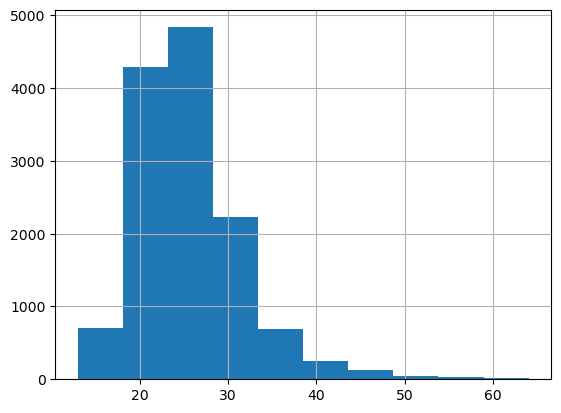

In [ ]:
# Gold medals
gold = athletes[athletes['Medal'] == 'Gold'].copy()
gold['Age'].hist()